# Time-Series Prediction with RNN

Step 1: Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

def load_and_preprocess_data(file_path):
    df = pd.read_csv('apple_sp.csv')
    print(df.head())


    # Clean the 'Close' column by removing '$' and converting to float
    df['Close'] = df['Close'].str.replace('$', '').astype(float)
    df.head()
    print(df.head())
    # Extract close prices and convert to numpy array
    data = df['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)

    # Split into train and test sets (80-20 split)
    train_size = int(len(normalized_data) * 0.8)
    train_data = normalized_data[:train_size]
    test_data = normalized_data[train_size:]

    return train_data, test_data, scaler

# Load and preprocess data
train_data, test_data, scaler = load_and_preprocess_data('AAPL_stock_data.csv')

# Print shapes
print("Data shapes after preprocessing:")
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

         Date    Close     Volume     Open     High      Low
0  02/28/2020  $273.36  106721200  $257.26  $278.41  $256.37
1  02/27/2020  $273.52   80151380  $281.10     $286  $272.96
2  02/26/2020  $292.65   49678430  $286.53  $297.88  $286.50
3  02/25/2020  $288.08   57668360  $300.95  $302.53  $286.13
4  02/24/2020  $298.18   55548830  $297.26  $304.18  $289.23
         Date   Close     Volume     Open     High      Low
0  02/28/2020  273.36  106721200  $257.26  $278.41  $256.37
1  02/27/2020  273.52   80151380  $281.10     $286  $272.96
2  02/26/2020  292.65   49678430  $286.53  $297.88  $286.50
3  02/25/2020  288.08   57668360  $300.95  $302.53  $286.13
4  02/24/2020  298.18   55548830  $297.26  $304.18  $289.23
Data shapes after preprocessing:
Training data shape: (2014, 1)
Testing data shape: (504, 1)


Step 2: Create Training Sequences

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences
seq_length = 60  # 60 days of historical data
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape for RNN
X_train = X_train.reshape((X_train.shape[0], seq_length, 1))
X_test = X_test.reshape((X_test.shape[0], seq_length, 1))

print("\nSequence shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


Sequence shapes:
X_train shape: (1954, 60, 1)
y_train shape: (1954, 1)
X_test shape: (444, 60, 1)
y_test shape: (444, 1)


Step 3: Build the RNN Model

In [ ]:
def build_model(seq_length):
    model = Sequential([
        SimpleRNN(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
        SimpleRNN(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Build model
model = build_model(seq_length)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

Step 4: Train the Model

In [ ]:
history = model.fit( X_train, y_train, epochs=50, batch_size=32,validation_split=0.1,verbose=1)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0285 - val_loss: 2.4474e-04
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.3891e-04 - val_loss: 4.5111e-05
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.7693e-05 - val_loss: 4.5927e-05
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 8.2841e-05 - val_loss: 4.8873e-05
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.1581e-05 - val_loss: 4.1706e-05
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 8.9310e-05 - val_loss: 5.2374e-05
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.3089e-05 - val_loss: 3.9498e-05
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 8.8453e-05 - val_loss: 3.9732e-05
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 9.8635e-05 - val_loss: 4.4841e-05
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 7.8713e-05 - val_loss: 4.1136e-05
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.9200e-05 - 

Step 5: Make Predictions

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


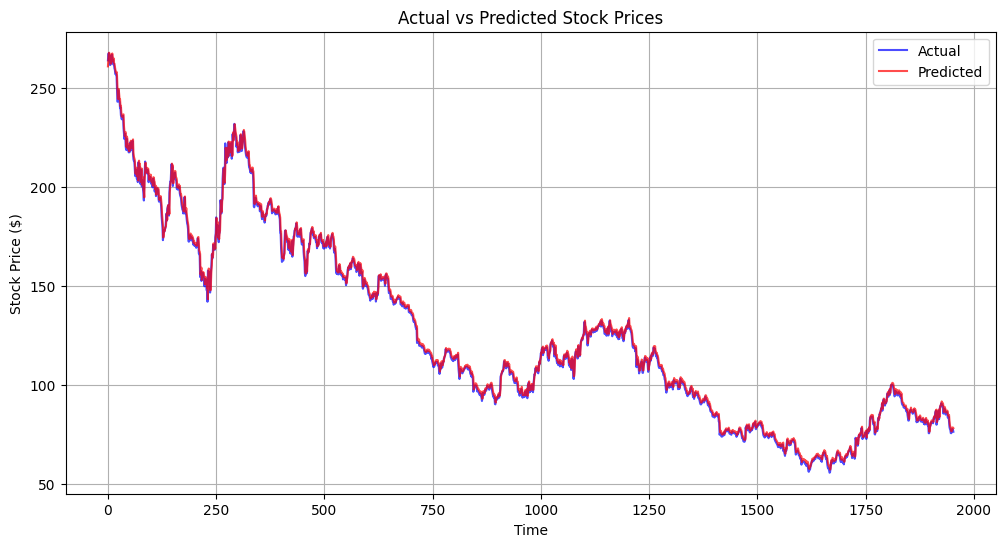

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions
train_pred = scaler.inverse_transform(train_predictions)
test_pred = scaler.inverse_transform(test_predictions)
y_train_orig = scaler.inverse_transform(y_train)
y_test_orig = scaler.inverse_transform(y_test)

# Plot training predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train_orig, label='Actual', color='blue', alpha=0.7)
plt.plot(train_pred, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Step 6: Evaluation
Compute Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


In [ ]:
train_mae = mean_absolute_error(y_train_orig, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train_orig, train_pred))
test_mae = mean_absolute_error(y_test_orig, test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))

print("Model Performance Metrics:")
print("=========================")
print("\nTraining Metrics:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print("\nTesting Metrics:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")